In [1]:
import numpy as np
import os
import sys
import multiprocessing
import time

# PyTorch dependencies
import torch as pt

import aptbps
import bps
from modelnet40 import load_modelnet40 # local dependency from bps demos
import matplotlib.pyplot as plt

In [2]:
# Modify as needed
MAIN_PATH = os.path.join('aptbps-code')
MOD40_PATH = os.path.join(MAIN_PATH, 'modelnet40')
LOGS_PATH = os.path.join(MOD40_PATH, 'logs')
DATA_PATH = os.path.join(MOD40_PATH, 'data')
BPS_CACHE_FILE = os.path.join(DATA_PATH, 'bps_mlp_data.npz')
APTBPS_CACHE_FILE = os.path.join(DATA_PATH, 'aptbps_mlp_data.npz')

if not os.path.exists(LOGS_PATH):
    os.makedirs(LOGS_PATH)

GPU device found...


In [3]:
# Load point clouds from ModelNet40
xtr, ytr, xte, yte = load_modelnet40(root_data_dir=DATA_PATH)

# Normalize point clouds
xtr_normalized = bps.normalize(xtr)

loading ModelNet40 point clouds...
loaded 9840 training and 2468 test samples.


In [8]:
# Take a sample of 100 clouds from the training dataset
np.random.seed(13)
xtr_sample = xtr_normalized[np.random.randint(0, xtr_normalized.shape[0], 100)]

In [9]:
xtr_sample.shape

(100, 2048, 3)

All tests are done single-threaded, collecting the CPU time.

In [10]:
bps_times = []
N_ITERATIONS = 1000
for i in range (0, N_ITERATIONS):
    if i % 20 == 0:
        print("iteration n. " + str(i))
    start = time.process_time()
    xtr_bps = aptbps.adaptive_encode(xtr_sample, n_parts=1, verbose=False, n_jobs=1)
    end = time.process_time()
    total_training_time = (end - start)
    bps_times.append(total_training_time)
mean_bps_time = np.mean(bps_times)
print("mean bps time: " + str(mean_bps_time))

iteration n. 0
iteration n. 20
iteration n. 40
iteration n. 60
iteration n. 80
iteration n. 100
iteration n. 120
iteration n. 140
iteration n. 160
iteration n. 180
iteration n. 200
iteration n. 220
iteration n. 240
iteration n. 260
iteration n. 280
iteration n. 300
iteration n. 320
iteration n. 340
iteration n. 360
iteration n. 380
iteration n. 400
iteration n. 420
iteration n. 440
iteration n. 460
iteration n. 480
iteration n. 500
iteration n. 520
iteration n. 540
iteration n. 560
iteration n. 580
iteration n. 600
iteration n. 620
iteration n. 640
iteration n. 660
iteration n. 680
iteration n. 700
iteration n. 720
iteration n. 740
iteration n. 760
iteration n. 780
iteration n. 800
iteration n. 820
iteration n. 840
iteration n. 860
iteration n. 880
iteration n. 900
iteration n. 920
iteration n. 940
iteration n. 960
iteration n. 980
mean bps time: 0.18784678974599925


In [15]:
fftkde_aptbps_times = []
N_ITERATIONS = 1000
for i in range (0, N_ITERATIONS):
    if i % 20 == 0:
        print("iteration n. " + str(i))
    start = time.process_time()
    # triangle-fftkde
    xtr_fftkde_aptbps = aptbps.adaptive_encode(xtr_sample, kde='fft', n_parts=2, verbose=False, n_jobs=1)
    end = time.process_time()
    total_training_time = (end - start)
    fftkde_aptbps_times.append(total_training_time)
mean_fftkde_aptbps_time = np.mean(fftkde_aptbps_times)
print("mean fftkde aptbps time: " + str(mean_fftkde_aptbps_time))

iteration n. 0
iteration n. 20
iteration n. 40
iteration n. 60
iteration n. 80
iteration n. 100
iteration n. 120
iteration n. 140
iteration n. 160
iteration n. 180
iteration n. 200
iteration n. 220
iteration n. 240
iteration n. 260
iteration n. 280
iteration n. 300
iteration n. 320
iteration n. 340
iteration n. 360
iteration n. 380
iteration n. 400
iteration n. 420
iteration n. 440
iteration n. 460
iteration n. 480
iteration n. 500
iteration n. 520
iteration n. 540
iteration n. 560
iteration n. 580
iteration n. 600
iteration n. 620
iteration n. 640
iteration n. 660
iteration n. 680
iteration n. 700
iteration n. 720
iteration n. 740
iteration n. 760
iteration n. 780
iteration n. 800
iteration n. 820
iteration n. 840
iteration n. 860
iteration n. 880
iteration n. 900
iteration n. 920
iteration n. 940
iteration n. 960
iteration n. 980
mean fftkde aptbps time: 0.6485394895859975


In [16]:
gkde_aptbps_times = []
N_ITERATIONS = 1000
for i in range (0, N_ITERATIONS):
    if i % 20 == 0:
        print("iteration n. " + str(i))
    start = time.process_time()
    # triangle-gkde
    xtr_gkde_aptbps = aptbps.adaptive_encode(xtr_sample, n_parts=2, verbose=False, n_jobs=1)
    end = time.process_time()
    total_training_time = (end - start)
    gkde_aptbps_times.append(total_training_time)
mean_gkde_aptbps_time = np.mean(gkde_aptbps_times)
print("mean gaussian kde aptbps time: " + str(mean_gkde_aptbps_time))

iteration n. 0
iteration n. 20
iteration n. 40
iteration n. 60
iteration n. 80
iteration n. 100
iteration n. 120
iteration n. 140
iteration n. 160
iteration n. 180
iteration n. 200
iteration n. 220
iteration n. 240
iteration n. 260
iteration n. 280
iteration n. 300
iteration n. 320
iteration n. 340
iteration n. 360
iteration n. 380
iteration n. 400
iteration n. 420
iteration n. 440
iteration n. 460
iteration n. 480
iteration n. 500
iteration n. 520
iteration n. 540
iteration n. 560
iteration n. 580
iteration n. 600
iteration n. 620
iteration n. 640
iteration n. 660
iteration n. 680
iteration n. 700
iteration n. 720
iteration n. 740
iteration n. 760
iteration n. 780
iteration n. 800
iteration n. 820
iteration n. 840
iteration n. 860
iteration n. 880
iteration n. 900
iteration n. 920
iteration n. 940
iteration n. 960
iteration n. 980
mean gaussian kde aptbps time: 17.71632170351896


In [61]:
# Calculate standard deviations
gkde_std = np.std(gkde_aptbps_times)
fftkde_std = np.std(fftkde_aptbps_times)
bps_std = np.std(bps_times)
print(gkde_std, fftkde_std, bps_std)

0.09248776022151502 0.017205025944769876 0.0019620951073589525


In [112]:
# Save data
np.savetxt("bps_encoding_times.csv", bps_times, delimiter=',', header='')
np.savetxt("gkde_aptbps_encoding_times.csv", gkde_aptbps_times, delimiter=',', header='')
np.savetxt("fftkde_aptbps_encoding_times.csv", fftkde_aptbps_times, delimiter=',', header='')

Text(0.5, 3.3999999999999986, 'Encoding method')

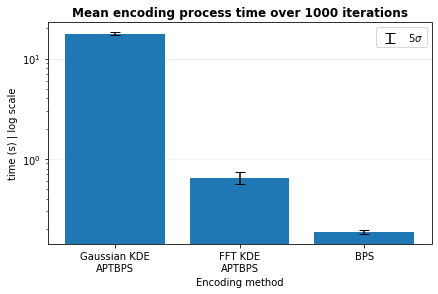

In [106]:
fig, ax = plt.subplots()
ax.bar(["Gaussian KDE\nAPTBPS", "FFT KDE\nAPTBPS", "BPS"], 
       [mean_gkde_aptbps_time,mean_fftkde_aptbps_time,mean_bps_time], 
       yerr=[5*gkde_std, 5*fftkde_std, 5*bps_std], 
       error_kw={'label': '$5\sigma$', 'capsize': 5})

ax.set_title("Mean encoding process time over 1000 iterations", weight='bold')
ax.set_yscale("log")
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.legend()
fig.tight_layout()
ax.set_ylabel("time (s) | log scale")
ax.set_xlabel("Encoding method")

In [113]:
fig.savefig('encoding-time-comparison.svg')

In [115]:
# Values:
print("bps mean: " + str(mean_bps_time))
print("bps std: " + str(bps_std))

print("gkde aptbps mean: " + str(mean_gkde_aptbps_time))
print("gkde aptbps std: " + str(gkde_std))

print("bps mean: " + str(mean_fftkde_aptbps_time))
print("bps std: " + str(fftkde_std))

bps mean: 0.18784678974599925
bps std: 0.0019620951073589525
gkde aptbps mean: 17.71632170351896
gkde aptbps std: 0.09248776022151502
bps mean: 0.6485394895859975
bps std: 0.017205025944769876
